In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [40]:
cars93_df = pd.read_csv("data/cars93.csv")
print(cars93_df.shape)
cars93_df.head()

(93, 28)


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [41]:
cars93_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Min.Price'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Max.Price'}>],
       [<AxesSubplot:title={'center':'MPG.city'}>,
        <AxesSubplot:title={'center':'MPG.highway'}>,
        <AxesSubplot:title={'center':'EngineSize'}>,
        <AxesSubplot:title={'center':'Horsepower'}>],
       [<AxesSubplot:title={'center':'RPM'}>,
        <AxesSubplot:title={'center':'Rev.per.mile'}>,
        <AxesSubplot:title={'center':'Fuel.tank.capacity'}>,
        <AxesSubplot:title={'center':'Passengers'}>],
       [<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Wheelbase'}>,
        <AxesSubplot:title={'center':'Width'}>,
        <AxesSubplot:title={'center':'Turn.circle'}>],
       [<AxesSubplot:title={'center':'Rear.seat.room'}>,
        <AxesSubplot:title={'center':'Luggage.room'}>,
        <AxesSubplot:title={'center':'Weight'}>, <

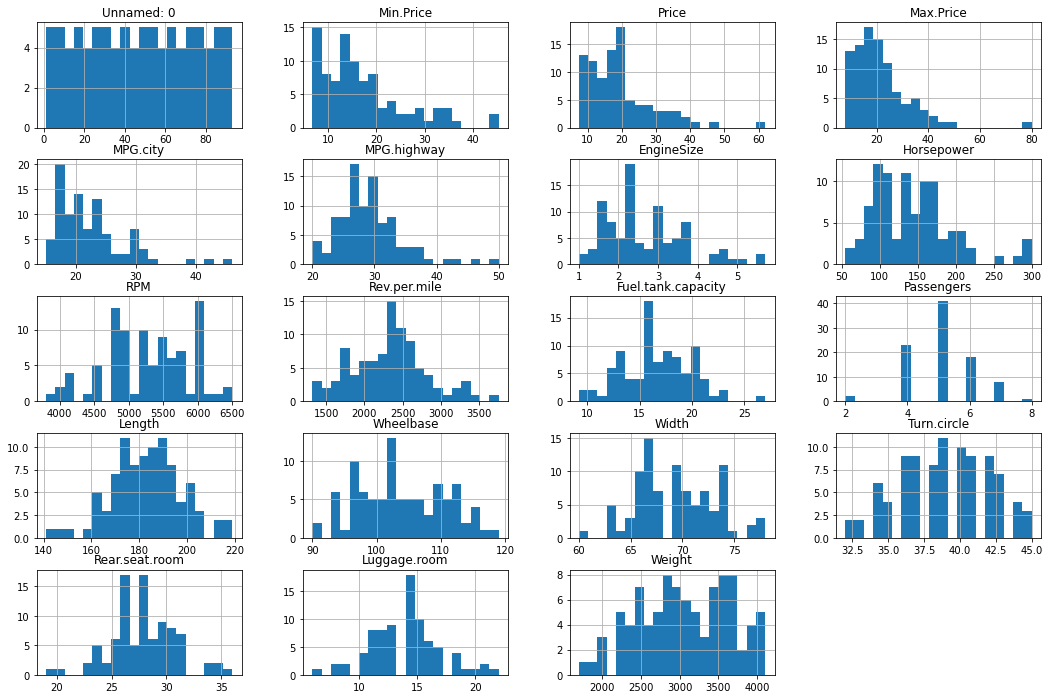

In [42]:
cars93_df.hist(figsize=(18,12), bins=20)


Column: Unnamed: 0
mean: 47.0, std:26.99073915253156
Lower Bound: -33.97221745759468, Upper Bound: 127.97221745759468
Outlier count: 0 


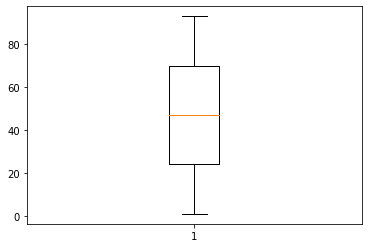

Column: Min.Price
mean: 17.125806451612902, std:8.746028952638603
Lower Bound: -9.112280406302908, Upper Bound: 43.36389330952871
Outlier count: 2 


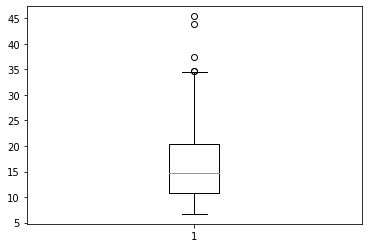

Column: Price
mean: 19.509677419354837, std:9.659429550580962
Lower Bound: -9.46861123238805, Upper Bound: 48.48796607109772
Outlier count: 1 


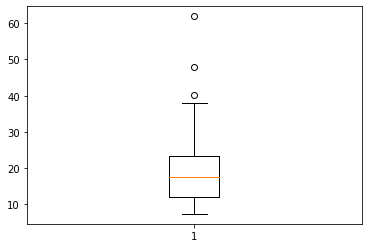

Column: Max.Price
mean: 21.898924731182806, std:11.030456794353492
Lower Bound: -11.192445651877673, Upper Bound: 54.99029511424328
Outlier count: 1 


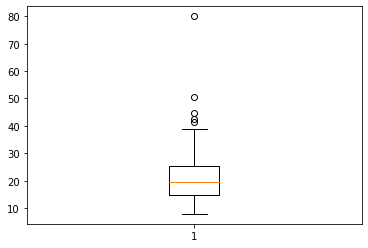

Column: MPG.city
mean: 22.365591397849464, std:5.61981151284678
Lower Bound: 5.506156859309126, Upper Bound: 39.2250259363898
Outlier count: 2 


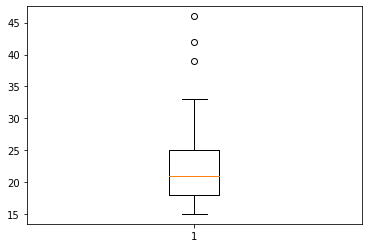

Column: MPG.highway
mean: 29.086021505376344, std:5.331726031764326
Lower Bound: 13.090843410083366, Upper Bound: 45.08119960066932
Outlier count: 2 


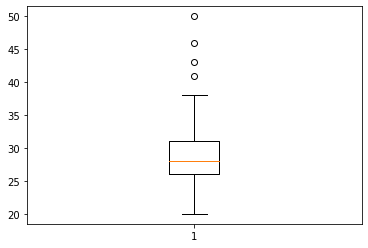

Column: EngineSize
mean: 2.6677419354838716, std:1.0373630124673543
Lower Bound: -0.44434710191819127, Upper Bound: 5.779830972885934
Outlier count: 0 


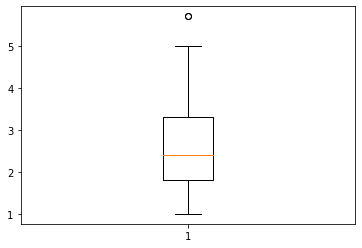

Column: Horsepower
mean: 143.8279569892473, std:52.37440954443844
Lower Bound: -13.295271644068038, Upper Bound: 300.95118562256266
Outlier count: 0 


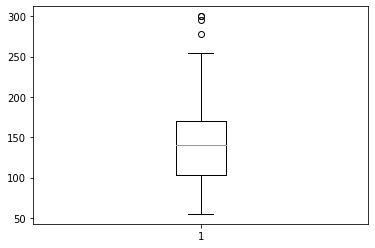

Column: RPM
mean: 5280.645161290323, std:596.7316898551804
Lower Bound: 3490.4500917247815, Upper Bound: 7070.840230855864
Outlier count: 0 


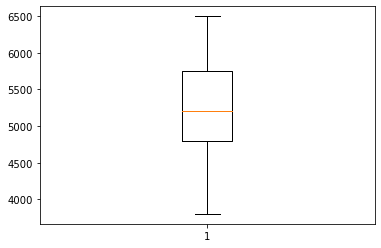

Column: Rev.per.mile
mean: 2332.2043010752686, std:496.5065251802006
Lower Bound: 842.684725534667, Upper Bound: 3821.7238766158703
Outlier count: 0 


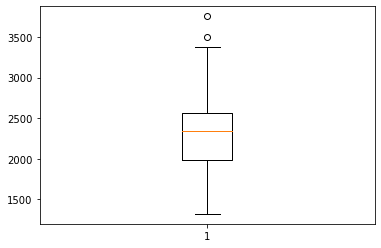

Column: Fuel.tank.capacity
mean: 16.664516129032265, std:3.279370471178428
Lower Bound: 6.826404715496981, Upper Bound: 26.50262754256755
Outlier count: 1 


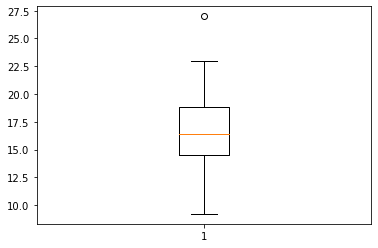

Column: Passengers
mean: 5.086021505376344, std:1.0389785324234753
Lower Bound: 1.9690859081059182, Upper Bound: 8.20295710264677
Outlier count: 0 


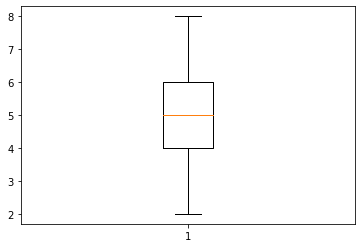

Column: Length
mean: 183.20430107526883, std:14.602381535799699
Lower Bound: 139.39715646786973, Upper Bound: 227.01144568266793
Outlier count: 0 


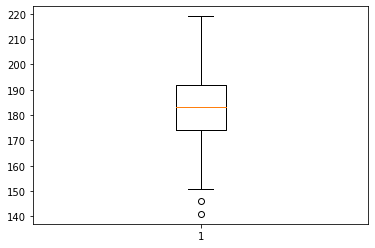

Column: Wheelbase
mean: 103.94623655913979, std:6.819673572766051
Lower Bound: 83.48721584084163, Upper Bound: 124.40525727743795
Outlier count: 0 


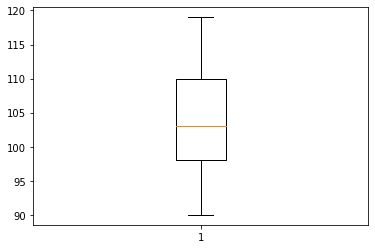

Column: Width
mean: 69.3763440860215, std:3.7789864597437526
Lower Bound: 58.039384706790244, Upper Bound: 80.71330346525276
Outlier count: 0 


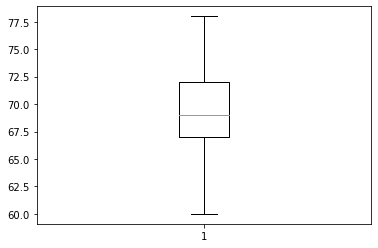

Column: Turn.circle
mean: 38.956989247311824, std:3.2232645431457407
Lower Bound: 29.287195617874602, Upper Bound: 48.62678287674905
Outlier count: 0 


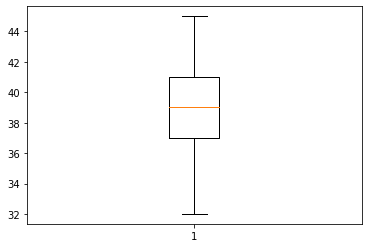

Column: Rear.seat.room
mean: 27.82967032967033, std:2.98907248733689
Lower Bound: 18.86245286765966, Upper Bound: 36.796887791681
Outlier count: 0 


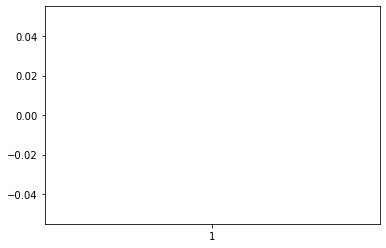

Column: Luggage.room
mean: 13.890243902439025, std:2.9979667906847762
Lower Bound: 4.896343530384696, Upper Bound: 22.88414427449335
Outlier count: 0 


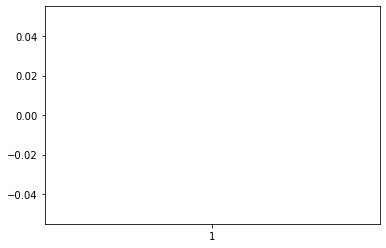

Column: Weight
mean: 3072.9032258064517, std:589.8965101667175
Lower Bound: 1303.2136953062993, Upper Bound: 4842.592756306604
Outlier count: 0 


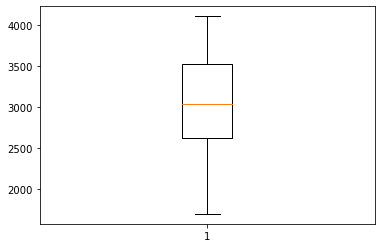

In [43]:
for column in cars93_df.columns:
    if(pd.api.types.is_numeric_dtype(cars93_df[column])):
        mean = cars93_df[column].mean()
        std = cars93_df[column].std()
        new_df = cars93_df[(cars93_df[column] < (mean - 3 * std)) | (cars93_df[column] > (mean + 3 * std))] 
        print(f'=======================================================')
        print(f'Column: {column}') 
        print(f'mean: {mean}, std:{std}')
        print(f'Lower Bound: {mean - 3 * std}, Upper Bound: {mean + 3 * std}')
        print(f'Outlier count: {new_df.shape[0]} ')
        plt.boxplot(cars93_df[column])
        plt.show()
        print(f'=======================================================')


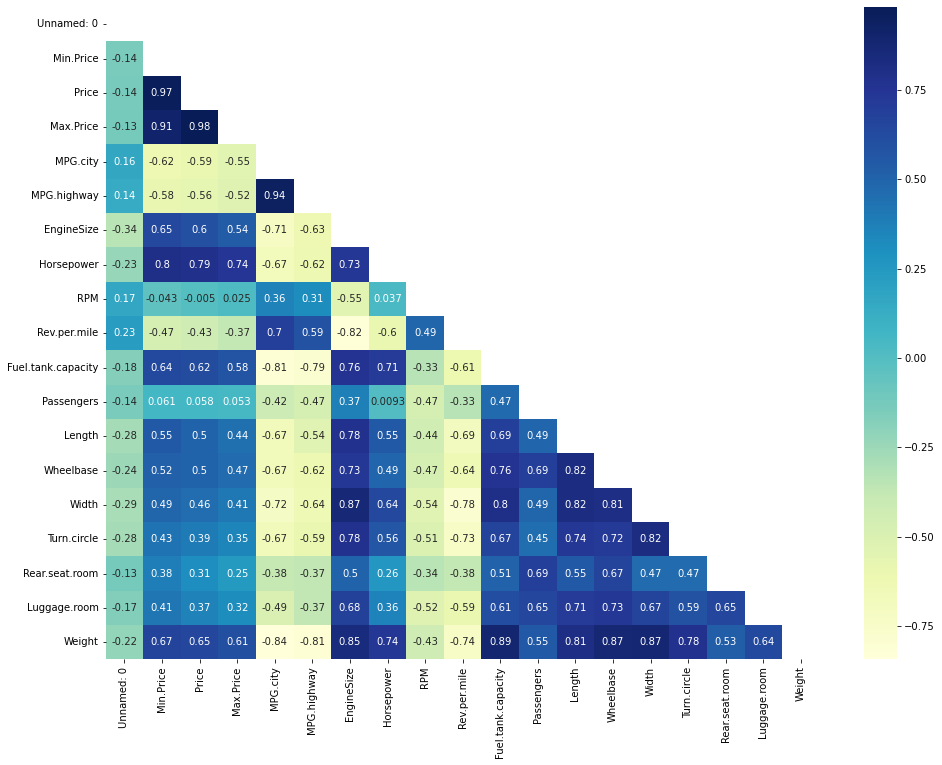

In [44]:
fig, ax = plt.subplots(figsize=(16, 12))

mask = np.triu(np.ones_like(cars93_df.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(cars93_df.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [45]:
cars93_df.isna().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [46]:
cars93_df[cars93_df["Luggage.room"].isna()]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
15,16,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
16,17,Chevrolet,Astro,Van,14.7,16.6,18.6,15,20,None,...,8,194,111,78,42,33.5,NaN,4025,USA,Chevrolet Astro
18,19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,...,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
25,26,Dodge,Caravan,Van,13.6,19.0,24.4,17,21,Driver only,...,7,175,112,72,42,26.5,NaN,3705,USA,Dodge Caravan
35,36,Ford,Aerostar,Van,14.5,19.9,25.3,15,20,Driver only,...,7,176,119,72,45,30.0,NaN,3735,USA,Ford Aerostar
55,56,Mazda,MPV,Van,16.6,19.1,21.7,18,24,None,...,7,190,110,72,39,27.5,NaN,3735,non-USA,Mazda MPV
56,57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7
65,66,Nissan,Quest,Van,16.7,19.1,21.5,17,23,None,...,7,190,112,74,41,27.0,NaN,4100,non-USA,Nissan Quest
69,70,Oldsmobile,Silhouette,Van,19.5,19.5,19.5,18,23,None,...,7,194,110,74,44,30.5,NaN,3715,USA,Oldsmobile Silhouette
86,87,Toyota,Previa,Van,18.9,22.7,26.6,18,22,Driver only,...,7,187,113,71,41,35.0,NaN,3785,non-USA,Toyota Previa


In [47]:
cars93_df[cars93_df["Rear.seat.room"].isna()]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
18,19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,...,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
56,57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7


# Question 2: 
## Drop any column that is not categorical or numeric.

In [48]:
cars93_df.drop(columns=['Unnamed: 0', 'Model', 'Make'], inplace=True)
cars93_df

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Van,16.6,19.7,22.7,17,21,None,Front,5,...,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA
89,Volkswagen,Compact,17.6,20.0,22.4,21,30,None,Front,4,...,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA
90,Volkswagen,Sporty,22.9,23.3,23.7,18,25,None,Front,6,...,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA
91,Volvo,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,4,...,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA


## Clean the data and remove missing values


In [49]:
print(cars93_df.count())
cars93_df.dropna(inplace=True)
print("---------------------------------")
cars93_df.count()

Manufacturer          93
Type                  93
Min.Price             93
Price                 93
Max.Price             93
MPG.city              93
MPG.highway           93
AirBags               93
DriveTrain            93
Cylinders             93
EngineSize            93
Horsepower            93
RPM                   93
Rev.per.mile          93
Man.trans.avail       93
Fuel.tank.capacity    93
Passengers            93
Length                93
Wheelbase             93
Width                 93
Turn.circle           93
Rear.seat.room        91
Luggage.room          82
Weight                93
Origin                93
dtype: int64
---------------------------------


Manufacturer          82
Type                  82
Min.Price             82
Price                 82
Max.Price             82
MPG.city              82
MPG.highway           82
AirBags               82
DriveTrain            82
Cylinders             82
EngineSize            82
Horsepower            82
RPM                   82
Rev.per.mile          82
Man.trans.avail       82
Fuel.tank.capacity    82
Passengers            82
Length                82
Wheelbase             82
Width                 82
Turn.circle           82
Rear.seat.room        82
Luggage.room          82
Weight                82
Origin                82
dtype: int64

##  Let our target variable be MPG.highway again. Separate the independent variables from the dependent variable.


In [50]:
y = cars93_df.pop('MPG.highway')
X = cars93_df.copy()

In [51]:
y


0     31
1     25
2     26
3     26
4     30
      ..
87    33
89    30
90    25
91    28
92    28
Name: MPG.highway, Length: 82, dtype: int64

In [52]:
X

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,AirBags,DriveTrain,Cylinders,EngineSize,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,12.9,15.9,18.8,25,None,Front,4,1.8,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,Driver & Passenger,Front,6,3.2,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,Driver only,Front,6,2.8,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,Driver & Passenger,Front,6,2.8,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,Driver only,Rear,4,3.5,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Volkswagen,Small,8.7,9.1,9.5,25,None,Front,4,1.8,...,12.4,4,163,93,63,34,26.0,10.0,2240,non-USA
89,Volkswagen,Compact,17.6,20.0,22.4,21,None,Front,4,2.0,...,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA
90,Volkswagen,Sporty,22.9,23.3,23.7,18,None,Front,6,2.8,...,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA
91,Volvo,Compact,21.8,22.7,23.5,21,Driver only,Rear,4,2.3,...,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA


# Question 3:  Generate dummy variables for the categorical features.

In [53]:
X_dummies = pd.get_dummies(X,drop_first=True)
X_dummies

,Min.Price,Price,Max.Price,MPG.city,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,...,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Man.trans.avail_Yes,Origin_non-USA
0,12.9,15.9,18.8,25,1.8,140,6300,2890,13.2,5,...,0,1,1,0,1,0,0,0,1,1
1,29.2,33.9,38.7,18,3.2,200,5500,2335,18.0,5,...,0,0,1,0,0,0,1,0,1,1
2,25.9,29.1,32.3,20,2.8,172,5500,2280,16.9,5,...,1,0,1,0,0,0,1,0,1,1
3,30.8,37.7,44.6,19,2.8,172,5500,2535,21.1,6,...,0,0,1,0,0,0,1,0,1,1
4,23.7,30.0,36.2,22,3.5,208,5700,2545,21.1,4,...,1,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,8.7,9.1,9.5,25,1.8,81,5500,2550,12.4,4,...,0,1,1,0,1,0,0,0,1,1
89,17.6,20.0,22.4,21,2.0,134,5800,2685,18.5,5,...,0,1,1,0,1,0,0,0,1,1
90,22.9,23.3,23.7,18,2.8,178,5800,2385,18.5,4,...,0,1,1,0,0,0,1,0,1,1
91,21.8,22.7,23.5,21,2.3,114,5400,2215,15.8,5,...,1,0,0,1,1,0,0,0,1,1


# Questions 4 Create a training set that's 75% of your data set and a complementary test set with the remaining 25%. Specify random_state=0.


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=0, test_size=0.25)


# Question 5 Train the model using the LinearRegression class. Leave all parameters at their default values.


In [55]:
car_model = LinearRegression()
car_model.fit(X_train, y_train)

LinearRegression()

# Quesion 6 
## Use your model to generate predictions on the test set.



In [56]:
predictions = car_model.predict(X_test)
predictions

array([31.31563523, 25.96664851, 23.3373708 , 32.23188702, 20.76477693,
       14.9218933 , 37.87394751, 30.66418597, 33.12422347, 12.66682797,
       38.46148613, 34.59118603, 26.82491516, 28.81735221, 45.21269734,
       35.54973525, 35.48555385, 35.27280106, 38.58474666, 38.14118918,
       27.0869665 ])

In [57]:
y_test

31    30
2     26
71    30
48    24
8     27
47    22
45    34
13    28
90    25
60    26
34    30
87    33
26    27
81    30
38    50
84    32
63    33
83    37
53    36
43    33
6     28
Name: MPG.highway, dtype: int64

In [58]:
residuals = (y_test - predictions)
residuals

31    -1.315635
2      0.033351
71     6.662629
48    -8.231887
8      6.235223
47     7.078107
45    -3.873948
13    -2.664186
90    -8.124223
60    13.333172
34    -8.461486
87    -1.591186
26     0.175085
81     1.182648
38     4.787303
84    -3.549735
63    -2.485554
83     1.727199
53    -2.584747
43    -5.141189
6      0.913033
Name: MPG.highway, dtype: float64

## then create two scatter plots: one with predicted values against actual values, and another with residuals against predicted values

In [59]:
### the best case

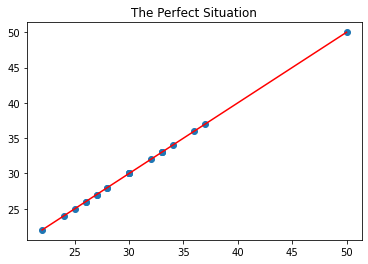

In [60]:
plt.scatter(y_test, y_test)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='r')
plt.title('The Perfect Situation')

plt.show()

In [61]:
### ours not perfect.

<class 'pandas.core.series.Series'>
[31.31563523 25.96664851 23.3373708  32.23188702 20.76477693 14.9218933
 37.87394751 30.66418597 33.12422347 12.66682797 38.46148613 34.59118603
 26.82491516 28.81735221 45.21269734 35.54973525 35.48555385 35.27280106
 38.58474666 38.14118918 27.0869665 ]
[27.0869665]


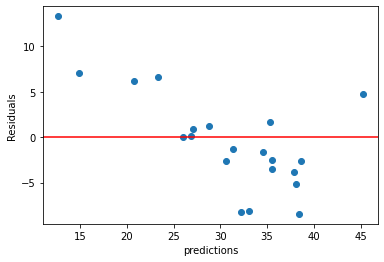

In [62]:
print(type(residuals))
print(predictions)
print(predictions[-1:])
plt.scatter(predictions, residuals)
#plt.plot([min(predictions), max(predictions)],[min(residuals), max(residuals)],  color='r')

#ax.vlines(residuals,predictions,y+dy)
plt.xlabel("predictions")
plt.ylabel("Residuals")
plt.axhline(y=0, color= 'r')
plt.show()

In [63]:
car_model.score(X_test,y_test) 

0.12169068579806464

# Question 7 Print out the actual model in equation form, i.e., y = b + c1x1 + c2x2 + c3x3 + ....


In [64]:
X_string = ""
count = 0
for i, coef in enumerate(car_model.coef_):
    X_string += f"( {round(coef, 3)} X{i} )+\n"
equation = f'Our Equation is y = {car_model.intercept_} + {X_string}'
print(equation)

Our Equation is y = 15.608668261701137 + ( 23.651 X0 )+
( -47.86 X1 )+
( 23.902 X2 )+
( 1.148 X3 )+
( -2.491 X4 )+
( 0.006 X5 )+
( 0.001 X6 )+
( -0.004 X7 )+
( 0.405 X8 )+
( 1.353 X9 )+
( 0.076 X10 )+
( -0.386 X11 )+
( -0.266 X12 )+
( 0.55 X13 )+
( -0.608 X14 )+
( 0.936 X15 )+
( 0.002 X16 )+
( -3.974 X17 )+
( 7.345 X18 )+
( -2.447 X19 )+
( 11.079 X20 )+
( 0.044 X21 )+
( -0.435 X22 )+
( -1.476 X23 )+
( -1.688 X24 )+
( -3.97 X25 )+
( -1.565 X26 )+
( -5.253 X27 )+
( -5.298 X28 )+
( -3.758 X29 )+
( 0.0 X30 )+
( 5.692 X31 )+
( 2.212 X32 )+
( -3.393 X33 )+
( 7.585 X34 )+
( -6.969 X35 )+
( -8.464 X36 )+
( -6.03 X37 )+
( -0.703 X38 )+
( 0.0 X39 )+
( -2.299 X40 )+
( -4.979 X41 )+
( 4.042 X42 )+
( 2.551 X43 )+
( -6.355 X44 )+
( -6.489 X45 )+
( 0.849 X46 )+
( 3.461 X47 )+
( 3.483 X48 )+
( 0.127 X49 )+
( -0.568 X50 )+
( 2.995 X51 )+
( -0.929 X52 )+
( -0.583 X53 )+
( 9.077 X54 )+
( 6.32 X55 )+
( -0.461 X56 )+
( -4.282 X57 )+
( 1.185 X58 )+
( -0.135 X59 )+
( 2.223 X60 )+
( 4.177 X61 )+



# Why so bad. 

                     Min.Price     Price  Max.Price  MPG.city  EngineSize  \
Min.Price             1.000000  0.971345   0.910395 -0.662646    0.705144   
Price                 0.971345  1.000000   0.982636 -0.621572    0.641806   
Max.Price             0.910395  0.982636   1.000000 -0.565159    0.567130   
MPG.city             -0.662646 -0.621572  -0.565159  1.000000   -0.747202   
EngineSize            0.705144  0.641806   0.567130 -0.747202    1.000000   
...                        ...       ...        ...       ...         ...   
Cylinders_6           0.461121  0.450042   0.424129 -0.487170    0.522759   
Cylinders_8           0.461772  0.394923   0.326861 -0.307556    0.594366   
Man.trans.avail_Yes  -0.470219 -0.410012  -0.347593  0.458292   -0.685044   
Origin_non-USA        0.067758  0.105914   0.130532  0.279043   -0.363324   
highwayMPG           -0.663767 -0.625925  -0.571861  0.945271   -0.666484   

                     Horsepower       RPM  Rev.per.mile  Fuel.tank.capacity

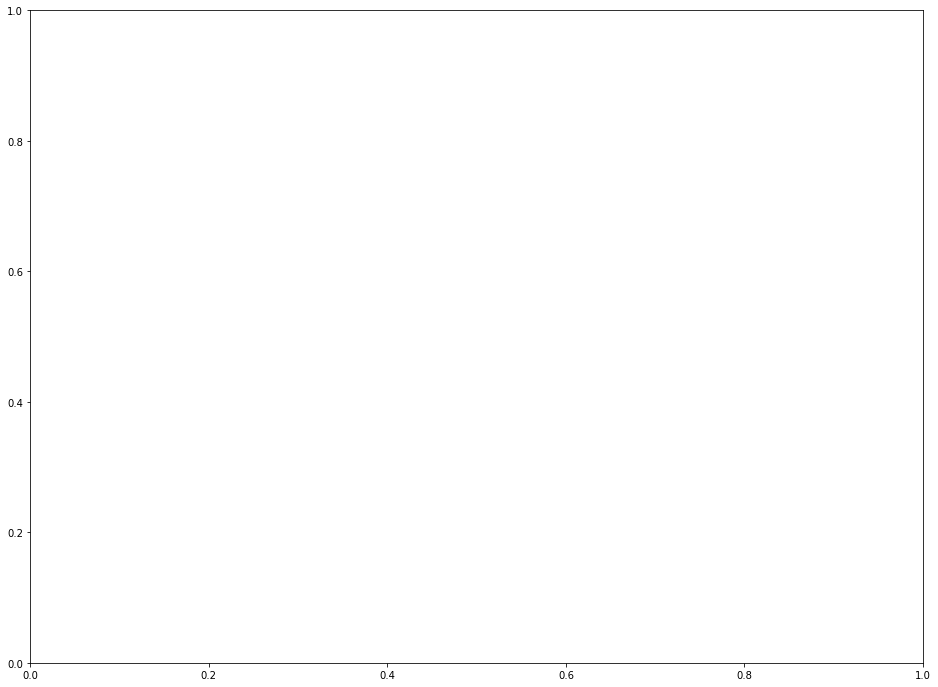

In [65]:
fig, ax = plt.subplots(figsize=(16, 12))
withdummies = X_dummies.copy()
withdummies['highwayMPG'] = y.copy()

print(withdummies.corr())
# plotting a triangle co